<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Exponential-Exponential-Exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [74]:
k = 5

Generate $k$ $\lambda$s: $\lambda_1, \dots, \lambda_k$.

In [75]:
lambda_list = np.random.uniform(2,3,k)
lambda_list

array([2.80706608, 2.88264045, 2.14159589, 2.17420018, 2.23685768])

For $X\sim Exp(\lambda_j)$, we have
\begin{eqnarray*}
f(x)=\lambda_j e^{-\lambda_j x }, \quad x>0.
\end{eqnarray*}

In [76]:
def ET_m(m, lambda_list, delta, eta):
    def Generate_Z(m, lambda_list):
        sum_of_x_list = []
        for i in range(len(lambda_list)):
            sum_of_x_list.append(np.sum(np.random.exponential(1/lambda_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, lambda_list, delta, eta):
        sum_of_time = 0
        y = np.random.exponential(1/delta)
        w = np.random.exponential(1/eta)
        Z_m = Generate_Z(m, lambda_list)
        while Z_m > y:
            sum_of_time = y + w
            Z_m = Generate_Z(m, lambda_list)
            y = np.random.exponential(1/delta)
            w = np.random.exponential(1/eta)
        return sum_of_time + Z_m

    ET = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, lambda_list, delta, eta)
        ET[i] = T_0/iter
        print(ET[i])
    return ET

0.13198593082084006
0.46494787386720454
0.8975271941292241
1.3469932816765753
1.8228960951057727
2.2817341660946155
2.803913391864513
3.3112341829810235
3.8330614542391794
4.310008624764315
4.831815635567958
5.314828890331432
5.807445152901981
6.289792443809428
6.73639925285018
7.248797812769561
7.666300615156812
8.158506717539717
8.592207600535893
8.989254373379742
9.434217689797789
9.879299723297136
10.244476582863268
10.687753286613605
11.090480488719983
11.479715842359072
11.863560509196512
12.27177369894427
12.64778719184562
13.018543301274889
13.385092648714195
13.748650557233153
14.08032068029956
14.464058558227395
14.864127828739493
15.150442582778517
15.501141248348626
15.854765458740086
16.175445352809707
16.529696401389273


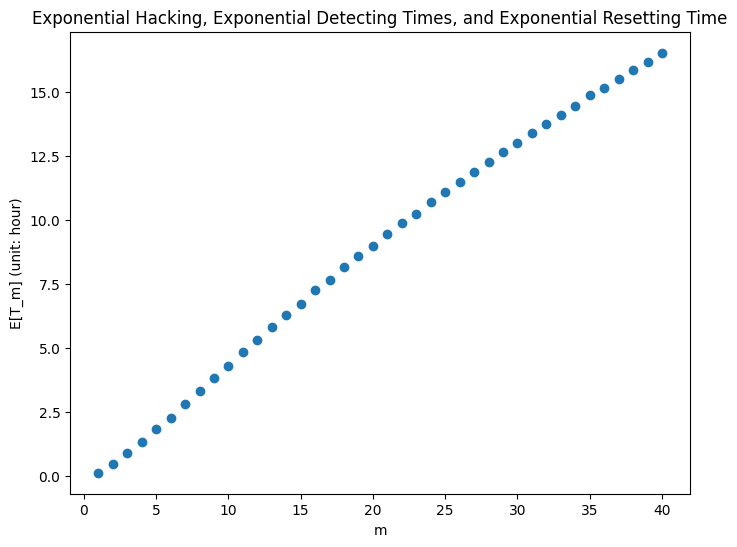

In [77]:
m = 40
delta = 1/3
eta = 1/2
ET_m = ET_m(m, lambda_list, delta, eta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'm')
plt.ylabel(r'E[T_m] (unit: hour)')
plt.title('Exponential Hacking, Exponential Detecting Times, and Exponential Resetting Time')
plt.show()